<a href="https://colab.research.google.com/github/Risad-Raihan/Demand_analysis/blob/main/Demand_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/drive/My Drive/ops_segmentation-main/alim.csv')

In [5]:
df

,Date,outlet,category,quantity
0,2023-09-02,Alim Knit (BD) Ltd.,Soybean Oil,21.0
1,2023-09-05,Alim Knit (BD) Ltd.,Soybean Oil,13.0
2,2023-09-08,Alim Knit (BD) Ltd.,Soybean Oil,22.0
3,2023-09-15,Alim Knit (BD) Ltd.,Soybean Oil,12.0
4,2023-09-18,Alim Knit (BD) Ltd.,Soybean Oil,18.0
...,...,...,...,...
375,2024-10-06,Alim Knit (BD) Ltd.,Soybean Oil,19.0
376,2024-10-09,Alim Knit (BD) Ltd.,Soybean Oil,11.0
377,2024-10-12,Alim Knit (BD) Ltd.,Soybean Oil,1.0
378,2024-10-19,Alim Knit (BD) Ltd.,Soybean Oil,23.0


In [6]:
!pip install pystan==2.19.1.1
!pip install prophet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 73.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
  Running setup.py clean for pystan
Failed to build pystan
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pystan)


In [7]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


In [8]:
# Make sure the 'Date' column is of datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Rename the columns for Prophet compatibility
df = df.rename(columns={'Date': 'ds', 'quantity': 'y'})

In [9]:
# Check the range of dates and look for any large gaps
print(df['ds'].min(), df['ds'].max())
print(df['ds'].diff().describe())


2023-09-01 00:00:00 2024-10-23 00:00:00
count                           379
mean      1 days 02:20:34.828496042
std      29 days 21:04:06.660253926
min             -335 days +00:00:00
25%                 3 days 00:00:00
50%                 3 days 00:00:00
75%                 7 days 00:00:00
max                20 days 00:00:00
Name: ds, dtype: object


In [10]:
# Convert 'Date' to datetime if not already done
df['ds'] = pd.to_datetime(df['ds'])

# Sort the DataFrame by date
df = df.sort_values(by='ds')


In [11]:
print(df['ds'].diff().describe())


count                          379
mean     1 days 02:28:10.765171503
std      0 days 16:19:45.537887790
min                1 days 00:00:00
25%                1 days 00:00:00
50%                1 days 00:00:00
75%                1 days 00:00:00
max               10 days 00:00:00
Name: ds, dtype: object


In [12]:
# Create a complete date range
date_range = pd.date_range(start=df['ds'].min(), end=df['ds'].max(), freq='D')

# Reindex the DataFrame
df = df.set_index('ds').reindex(date_range).reset_index().rename(columns={'index': 'ds'})




In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ds        419 non-null    datetime64[ns]
 1   outlet    380 non-null    object        
 2   category  380 non-null    object        
 3   y         380 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.2+ KB


In [14]:
df['y'].fillna(0, inplace=True)

<ipython-input-14-293cd1bff9b2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['y'].fillna(0, inplace=True)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ds        419 non-null    datetime64[ns]
 1   outlet    380 non-null    object        
 2   category  380 non-null    object        
 3   y         419 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.2+ KB


In [16]:
# Initialize and fit the Prophet model
model = Prophet(daily_seasonality=True)
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpilir6c62/6xbhxp41.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpilir6c62/ho403_zn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75938', 'data', 'file=/tmp/tmpilir6c62/6xbhxp41.json', 'init=/tmp/tmpilir6c62/ho403_zn.json', 'output', 'file=/tmp/tmpilir6c62/prophet_model9obcpg28/prophet_model-20241026132838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:28:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:28:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [17]:
# Create future dataframe and predict
future = model.make_future_dataframe(periods=60)  # Extend 60 days into the future
forecast = model.predict(future)

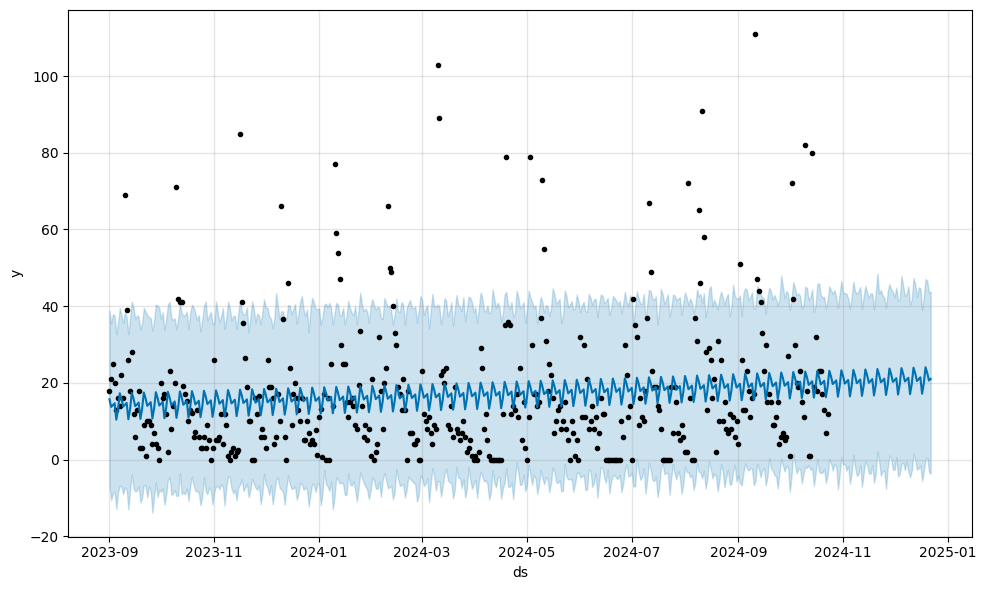

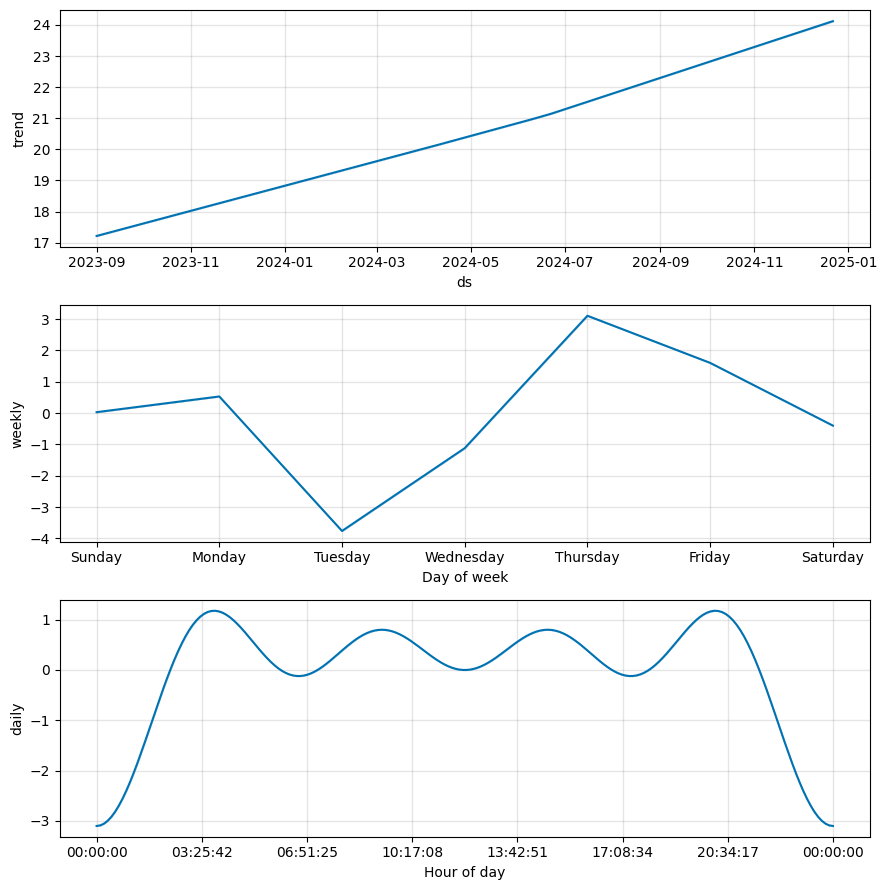

In [18]:
# Plot the forecast
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

In [19]:
# Forecast future values, including the recent period for validation
future = model.make_future_dataframe(periods=30)  # Adjust for days you want
forecast = model.predict(future)

# Extract the predictions for September or October
forecast_sept = forecast[(forecast['ds'] >= '2024-09-01') & (forecast['ds'] <= '2024-09-26')]
actual_sept = df[(df['ds'] >= '2024-09-01') & (df['ds'] <= '2024-09-26')]['y'].sum()

# Summing the forecast values to compare with the actuals
predicted_sept_total = forecast_sept['yhat'].sum()

# Display comparison
print(f"Predicted Total for September 2024: {predicted_sept_total}")
print(f"Actual Total for September 2024: {actual_sept}")


Predicted Total for September 2024: 503.19839218296505
Actual Total for September 2024: 622.0


In [20]:
def validate_forecast_for_month(month, year):
    # Create a start and end date for the specified month
    start_date = f"{year}-{str(month).zfill(2)}-01"
    end_date = f"{year}-{str(month).zfill(2)}-26"  # Adjust end day as per your data

    # Extract predictions for the specified month
    forecast_month = forecast[(forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)]
    predicted_total = forecast_month['yhat'].sum()

    # Extract actuals for the same month
    actual_total = df[(df['ds'] >= start_date) & (df['ds'] <= end_date)]['y'].sum()

    # Display comparison
    print(f"Predicted Total for {year}-{str(month).zfill(2)}: {predicted_total}")
    print(f"Actual Total for {year}-{str(month).zfill(2)}: {actual_total}")

# Example: Validate for different months
validate_forecast_for_month(8, 2024)  # August 2024
validate_forecast_for_month(9, 2024)  # September 2024
validate_forecast_for_month(10, 2024)  # October 2024 (if data available)


Predicted Total for 2024-08: 496.17501576725743
Actual Total for 2024-08: 662.0
Predicted Total for 2024-09: 503.19839218296505
Actual Total for 2024-09: 622.0
Predicted Total for 2024-10: 516.5276781179541
Actual Total for 2024-10: 579.0


In [21]:
def validate_forecast_for_month(month, year):
    # Create start and end dates
    start_date = f"{year}-{str(month).zfill(2)}-01"
    end_date = f"{year}-{str(month).zfill(2)}-26"  # Adjust based on available data

    # Extract forecast and actual data
    forecast_month = forecast[(forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)]
    predicted_total = forecast_month['yhat'].sum()

    actual_total = df[(df['ds'] >= start_date) & (df['ds'] <= end_date)]['y'].sum()

    # Calculate percentage error
    percentage_error = ((actual_total - predicted_total) / actual_total) * 100

    # Display comparison and error
    print(f"{year}-{str(month).zfill(2)} | Predicted: {predicted_total}, Actual: {actual_total}, "
          f"Error: {percentage_error:.2f}%")

# Validate for multiple months
for month in [8, 9, 10]:
    validate_forecast_for_month(month, 2024)


2024-08 | Predicted: 496.17501576725743, Actual: 662.0, Error: 25.05%
2024-09 | Predicted: 503.19839218296505, Actual: 622.0, Error: 19.10%
2024-10 | Predicted: 516.5276781179541, Actual: 579.0, Error: 10.79%


In [22]:
# Define the promotion periods
promotions = [
    ('2024-04-24', '2024-04-30'),
    ('2024-05-20', '2024-05-31'),
    ('2024-09-23', '2024-09-30'),
    ('2024-08-27', '2024-08-31')
]

# Create a new column to mark promotions
df['promotion'] = 0  # Default to 0 (no promotion)

# Mark promotion periods in the DataFrame
for start, end in promotions:
    mask = (df['ds'] >= start) & (df['ds'] <= end)
    df.loc[mask, 'promotion'] = 1

# Check if the promotion column is marked correctly
print(df.head(20))


           ds               outlet     category     y  promotion
0  2023-09-01  Alim Knit (BD) Ltd.  Soybean Oil  18.0          0
1  2023-09-02  Alim Knit (BD) Ltd.  Soybean Oil  21.0          0
2  2023-09-03  Alim Knit (BD) Ltd.  Soybean Oil  25.0          0
3  2023-09-04  Alim Knit (BD) Ltd.  Soybean Oil  20.0          0
4  2023-09-05  Alim Knit (BD) Ltd.  Soybean Oil  13.0          0
5  2023-09-06  Alim Knit (BD) Ltd.  Soybean Oil  16.0          0
6  2023-09-07  Alim Knit (BD) Ltd.  Soybean Oil  14.0          0
7  2023-09-08  Alim Knit (BD) Ltd.  Soybean Oil  22.0          0
8  2023-09-09  Alim Knit (BD) Ltd.  Soybean Oil  16.0          0
9  2023-09-10  Alim Knit (BD) Ltd.  Soybean Oil  69.0          0
10 2023-09-11  Alim Knit (BD) Ltd.  Soybean Oil  39.0          0
11 2023-09-12  Alim Knit (BD) Ltd.  Soybean Oil  26.0          0
12 2023-09-13  Alim Knit (BD) Ltd.  Soybean Oil  18.0          0
13 2023-09-14  Alim Knit (BD) Ltd.  Soybean Oil  28.0          0
14 2023-09-15  Alim Knit 

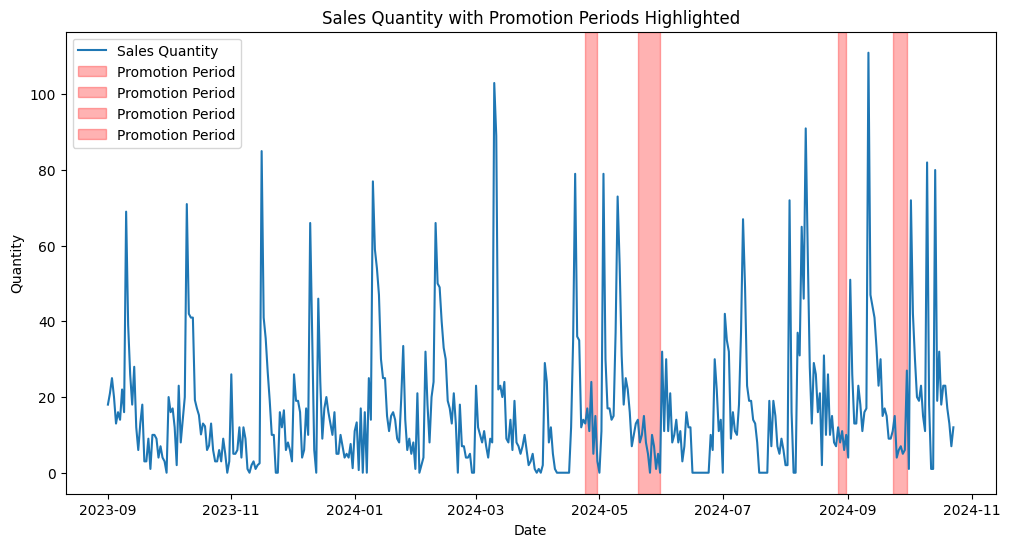

In [23]:
import matplotlib.pyplot as plt

# Plot sales quantity with promotion periods highlighted
plt.figure(figsize=(12, 6))

# Plot the original sales data
plt.plot(df['ds'], df['y'], label='Sales Quantity')

# Highlight the promotion periods
for start, end in promotions:
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.3, label='Promotion Period')

plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Sales Quantity with Promotion Periods Highlighted')
plt.legend(loc='upper left')
plt.show()


                        ds           y  promotion
count                  213  213.000000      213.0
mean   2023-12-16 00:00:00   15.829108        0.0
min    2023-09-01 00:00:00    0.000000        0.0
25%    2023-10-24 00:00:00    5.000000        0.0
50%    2023-12-16 00:00:00   11.000000        0.0
75%    2024-02-07 00:00:00   19.500000        0.0
max    2024-03-31 00:00:00  103.000000        0.0
std                    NaN   16.942160        0.0


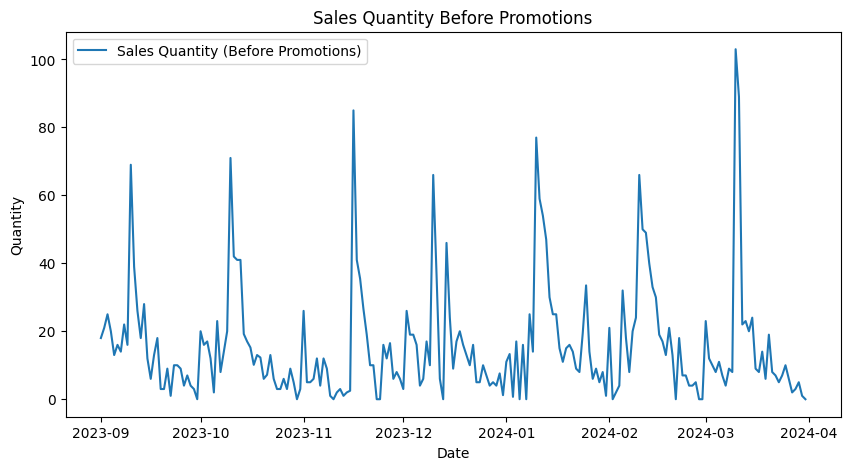

In [24]:
# Filter data before the first promotion (April 2024)
early_data = df[df['ds'] < '2024-04-01']

# Describe the early data to check for abnormalities
print(early_data.describe())

# Plot early data to visually inspect
plt.figure(figsize=(10, 5))
plt.plot(early_data['ds'], early_data['y'], label='Sales Quantity (Before Promotions)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Sales Quantity Before Promotions')
plt.legend()
plt.show()


In [ ]:
df.head()

In [26]:
# Make sure the 'promotion' column is correctly added to the future DataFrame
future = model.make_future_dataframe(periods=30)  # Adjust the periods as needed

# Add the 'promotion' column to the future DataFrame
future['promotion'] = 0  # Default to 0 (no promotion)

# Set promotion periods correctly in the future DataFrame
promotion_periods = [
    ('2024-04-24', '2024-04-30'),
    ('2024-05-20', '2024-05-31'),
    ('2024-08-27', '2024-08-31'),
    ('2024-09-23', '2024-09-30')
]

for start, end in promotion_periods:
    mask = (future['ds'] >= start) & (future['ds'] <= end)
    future.loc[mask, 'promotion'] = 1  # Set promotion days to 1

# Now, run the prediction
forecast = model.predict(future)

# Extract forecasts for August, September, and October
forecast_aug = forecast[(forecast['ds'] >= '2024-08-01') & (forecast['ds'] <= '2024-08-31')]
forecast_sep = forecast[(forecast['ds'] >= '2024-09-01') & (forecast['ds'] <= '2024-09-30')]
forecast_oct = forecast[(forecast['ds'] >= '2024-10-01') & (forecast['ds'] <= '2024-10-31')]

# Sum predicted values for each month
predicted_aug_total = forecast_aug['yhat'].sum()
predicted_sep_total = forecast_sep['yhat'].sum()
predicted_oct_total = forecast_oct['yhat'].sum()

# Actual values from your original dataset
actual_aug = df[(df['ds'] >= '2024-08-01') & (df['ds'] <= '2024-08-31')]['y'].sum()
actual_sep = df[(df['ds'] >= '2024-09-01') & (df['ds'] <= '2024-09-30')]['y'].sum()
actual_oct = df[(df['ds'] >= '2024-10-01') & (df['ds'] <= '2024-10-31')]['y'].sum()

# Calculate error ratios
error_aug = abs((predicted_aug_total - actual_aug) / actual_aug) * 100
error_sep = abs((predicted_sep_total - actual_sep) / actual_sep) * 100
error_oct = abs((predicted_oct_total - actual_oct) / actual_oct) * 100

# Print the results
print(f"2024-08 | Predicted: {predicted_aug_total}, Actual: {actual_aug}, Error: {error_aug:.2f}%")
print(f"2024-09 | Predicted: {predicted_sep_total}, Actual: {actual_sep}, Error: {error_sep:.2f}%")
print(f"2024-10 | Predicted: {predicted_oct_total}, Actual: {actual_oct}, Error: {error_oct:.2f}%")


Exception: Model has not been fit.

In [27]:
df['lag_7'] = df['y'].shift(7)  # 7-day lag feature
df['rolling_mean_7'] = df['y'].rolling(window=7).mean()  # 7-day rolling mean


In [28]:
# Step 1: Create a new Prophet instance
model = Prophet(daily_seasonality=True)

# Step 2: Add regressors before fitting the model
model.add_regressor('promotion')
model.add_regressor('lag_7')
model.add_regressor('rolling_mean_7')

# Step 3: Ensure your DataFrame contains the required columns
df['promotion'] = df['promotion'].fillna(0)  # Fill any missing values for regressors
df['lag_7'] = df['y'].shift(7).fillna(0)  # Handle lag feature for the first 7 days
df['rolling_mean_7'] = df['y'].rolling(window=7).mean().fillna(df['rolling_mean_7'].mean())

# Step 4: Fit the model with the DataFrame including these regressors
model.fit(df)


KeyError: 'promotion'

In [ ]:
# Step 1: Create a new Prophet instance
model = Prophet(daily_seasonality=True)

# Step 2: Add regressors before fitting the model
model.add_regressor('promotion')
model.add_regressor('lag_7')
model.add_regressor('rolling_mean_7')

# Step 3: Prepare your DataFrame by filling any missing values
df['promotion'] = df['promotion'].fillna(0)  # Fill NaN with 0
df['lag_7'] = df['y'].shift(7).fillna(0)  # Handle NaN for lag_7
df['rolling_mean_7'] = df['y'].rolling(window=7).mean().fillna(df['y'].mean())  # Fill rolling mean

# Step 4: Fit the model with the prepared DataFrame
model.fit(df)

# Step 5: Create the future DataFrame for prediction
future = model.make_future_dataframe(periods=30)  # Adjust the forecast horizon

from datetime import datetime

# Step 6: Add the same regressors to the future DataFrame
# Convert string dates to datetime for comparison
future['promotion'] = future['ds'].apply(
    lambda x: 1 if (
        (x >= datetime(2024, 4, 24) and x <= datetime(2024, 4, 30)) or
        (x >= datetime(2024, 5, 20) and x <= datetime(2024, 5, 31)) or
        (x >= datetime(2024, 8, 27) and x <= datetime(2024, 8, 31)) or
        (x >= datetime(2024, 9, 23) and x <= datetime(2024, 9, 30))
    ) else 0
)


# Add lag_7 and rolling_mean_7 to the future DataFrame
future['lag_7'] = df['y'].shift(7).fillna(0)
future['rolling_mean_7'] = df['y'].rolling(window=7).mean().fillna(df['y'].mean())

# Step 7: Make predictions
forecast = model.predict(future)

# Step 8: Display predictions for the relevant months
for month in ['2024-08', '2024-09', '2024-10']:
    forecast_month = forecast[(forecast['ds'] >= f'{month}-01') & (forecast['ds'] <= f'{month}-31')]
    actual_month = df[(df['ds'] >= f'{month}-01') & (df['ds'] <= f'{month}-31')]['y'].sum()
    predicted_month_total = forecast_month['yhat'].sum()

    # Display error for each month
    print(f"{month} | Predicted: {predicted_month_total}, Actual: {actual_month}, Error: {abs(predicted_month_total - actual_month) / actual_month * 100:.2f}%")


In [29]:
from prophet import Prophet
import pandas as pd
from datetime import datetime
import calendar

# Step 1: Create a new Prophet instance
model = Prophet(daily_seasonality=True)

# Step 2: Add regressors before fitting the model
model.add_regressor('promotion')
model.add_regressor('lag_7')
model.add_regressor('rolling_mean_7')

# Step 3: Prepare your DataFrame by filling any missing values
df['promotion'] = df['promotion'].fillna(0)  # Fill NaN with 0
df['lag_7'] = df['y'].shift(7).fillna(0)  # Handle NaN for lag_7
df['rolling_mean_7'] = df['y'].rolling(window=7).mean().fillna(df['y'].mean())  # Fill rolling mean

# Step 4: Fit the model with the prepared DataFrame
model.fit(df)

# Step 5: Create the future DataFrame for prediction
future = model.make_future_dataframe(periods=30)  # Adjust the forecast horizon

# Step 6: Add the same regressors to the future DataFrame
future['promotion'] = future['ds'].apply(
    lambda x: 1 if (
        (x >= datetime(2024, 4, 24) and x <= datetime(2024, 4, 30)) or
        (x >= datetime(2024, 5, 20) and x <= datetime(2024, 5, 31)) or
        (x >= datetime(2024, 8, 27) and x <= datetime(2024, 8, 31)) or
        (x >= datetime(2024, 9, 23) and x <= datetime(2024, 9, 30))
    ) else 0
)

# Ensure 'lag_7' and 'rolling_mean_7' match the future DataFrame dates
merged_future = future.merge(
    df[['ds', 'lag_7', 'rolling_mean_7']],
    on='ds', how='left'
)
merged_future['lag_7'] = merged_future['lag_7'].fillna(0)
merged_future['rolling_mean_7'] = merged_future['rolling_mean_7'].fillna(df['y'].mean())

# Step 7: Make predictions
forecast = model.predict(merged_future)

# Step 8: Function to get the last day of a month
def get_last_day(year, month):
    return calendar.monthrange(year, month)[1]

# Step 9: Display predictions for the relevant months
for month in ['2024-08', '2024-09', '2024-10']:
    year, month_num = map(int, month.split('-'))
    last_day = get_last_day(year, month_num)

    # Filter the forecast and actuals using the correct last day of the month
    forecast_month = forecast[(forecast['ds'] >= f'{month}-01') & (forecast['ds'] <= f'{month}-{last_day}')]
    actual_month = df[(df['ds'] >= f'{month}-01') & (df['ds'] <= f'{month}-{last_day}')]['y'].sum()
    predicted_month_total = forecast_month['yhat'].sum()

    # Display error for each month
    print(f"{month} | Predicted: {predicted_month_total}, Actual: {actual_month}, Error: {abs(predicted_month_total - actual_month) / actual_month * 100:.2f}%")


KeyError: 'promotion'

In [30]:
from prophet import Prophet
import pandas as pd
from datetime import datetime
import calendar

# Step 1: Create a new Prophet instance
model = Prophet(daily_seasonality=True)

# Step 2: Add regressors before fitting the model
model.add_regressor('promotion')
model.add_regressor('lag_7')
model.add_regressor('rolling_mean_7')

# Step 3: Prepare your DataFrame by filling any missing values
# Ensure 'promotion' exists and fill NaN values
if 'promotion' not in df.columns:
    df['promotion'] = 0

df['promotion'] = df['promotion'].fillna(0)  # Fill NaN with 0
df['lag_7'] = df['y'].shift(7).fillna(0)  # Handle NaN for lag_7
df['rolling_mean_7'] = df['y'].rolling(window=7).mean().fillna(df['y'].mean())  # Fill rolling mean

# Step 4: Fit the model with the prepared DataFrame
model.fit(df)

# Step 5: Create the future DataFrame for prediction
future = model.make_future_dataframe(periods=30)  # Adjust the forecast horizon

# Step 6: Add the same regressors to the future DataFrame
# Step 6a: Add promotion column to future DataFrame
future['promotion'] = future['ds'].apply(
    lambda x: 1 if (
        (x >= datetime(2024, 4, 24) and x <= datetime(2024, 4, 30)) or
        (x >= datetime(2024, 5, 20) and x <= datetime(2024, 5, 31)) or
        (x >= datetime(2024, 8, 27) and x <= datetime(2024, 8, 31)) or
        (x >= datetime(2024, 9, 23) and x <= datetime(2024, 9, 30))
    ) else 0
)

# Step 6b: Merge future DataFrame with lag and rolling mean values
# Make sure to add only the future dates which are in `df` for lag and rolling mean values
merged_future = future.merge(
    df[['ds', 'lag_7', 'rolling_mean_7']],
    on='ds', how='left'
)

# Step 6c: Fill missing values in the future DataFrame after merging
merged_future['lag_7'] = merged_future['lag_7'].fillna(0)
merged_future['rolling_mean_7'] = merged_future['rolling_mean_7'].fillna(df['y'].mean())

# Step 7: Make predictions
forecast = model.predict(merged_future)

# Step 8: Function to get the last day of a month
def get_last_day(year, month):
    return calendar.monthrange(year, month)[1]

# Step 9: Display predictions for the relevant months
for month in ['2024-08', '2024-09', '2024-10']:
    year, month_num = map(int, month.split('-'))
    last_day = get_last_day(year, month_num)

    # Filter the forecast and actuals using the correct last day of the month
    forecast_month = forecast[(forecast['ds'] >= f'{month}-01') & (forecast['ds'] <= f'{month}-{last_day}')]
    actual_month = df[(df['ds'] >= f'{month}-01') & (df['ds'] <= f'{month}-{last_day}')]['y'].sum()
    predicted_month_total = forecast_month['yhat'].sum()

    # Display error for each month
    print(f"{month} | Predicted: {predicted_month_total}, Actual: {actual_month}, Error: {abs(predicted_month_total - actual_month) / actual_month * 100:.2f}%")


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpilir6c62/3lg8l4mj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpilir6c62/9mu4y62s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97377', 'data', 'file=/tmp/tmpilir6c62/3lg8l4mj.json', 'init=/tmp/tmpilir6c62/9mu4y62s.json', 'output', 'file=/tmp/tmpilir6c62/prophet_model9nhxj54c/prophet_model-20241026133338.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


2024-08 | Predicted: 676.9748958278943, Actual: 709.0, Error: 4.52%
2024-09 | Predicted: 636.3541179731375, Actual: 667.0, Error: 4.59%
2024-10 | Predicted: 705.6359813038698, Actual: 579.0, Error: 21.87%


In [31]:
df.head()

,ds,outlet,category,y,promotion_x,promotion_y,lag_7,rolling_mean_7,promotion
0,2023-09-01,Alim Knit (BD) Ltd.,Soybean Oil,18.0,0,0.0,0.0,16.946539,0
1,2023-09-02,Alim Knit (BD) Ltd.,Soybean Oil,21.0,0,0.0,0.0,16.946539,0
2,2023-09-03,Alim Knit (BD) Ltd.,Soybean Oil,25.0,0,0.0,0.0,16.946539,0
3,2023-09-04,Alim Knit (BD) Ltd.,Soybean Oil,20.0,0,0.0,0.0,16.946539,0
4,2023-09-05,Alim Knit (BD) Ltd.,Soybean Oil,13.0,0,0.0,0.0,16.946539,0


In [32]:
###### for all outlet starts from here